#Nested Summarization with Heading Hierarchy


In [ ]:
import numpy as np
import pandas as pd

In [ ]:

document = "Health was earlier said to be the ability of the body functioning well. However, as time evolved, the definition of health also evolved. It cannot be stressed enough that health is the primary thing after which everything else follows. When you maintain good health, everything else falls into place.Similarly, maintaining good health is dependent on a lot of factors. It ranges from the air you breathe to the type of people you choose to spend your time with. Health has a lot of components that carry equal importance. If even one of them is missing, a person cannot be completely healthy. First, we have our physical health. This means being fit physically and in the absence of any kind of disease or illness. When you have good physical health, you will have a longer life span. One may maintain their physical health by having a balanced diet. Do not miss out on the essential nutrients; take each of them in appropriate quantities. Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the healthy calorie requirement of the body. Some of the foods like french fries, fried foods, pizza, burgers, candy, soft drinks, baked goods, ice cream, cookies, etc are the example of high-sugar and high-fat containing foods. It is found according to the Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes. "

#Preprocessing

Expanding Contractions

Eg: he's -> he is

In [ ]:

!pip install contractions
import contractions
from nltk.tokenize import word_tokenize
import re

In [ ]:
def expand_contractions(sentence):
    contractions_expanded = [contractions.fix(word) for word in sentence.split()]
    return ' '.join(contractions_expanded)

In [ ]:
document = expand_contractions(document)

In [ ]:
def split_into_sentences(doc):
    return [x for x in doc.split('.') if x != '']

In [ ]:
def remove_punctuation(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens]
def lower_case(tokens):
    return [word.lower() for word in tokens if word != '']

In [ ]:
def sentences_to_vectors(doc):
# doc is a list of sentences
# tokenize every sentence, convert to lower case and remove punctuation
    vectors = [word_tokenize(sentence) for sentence in doc]
    for i in range(len(vectors)):
        vectors[i] = lower_case(remove_punctuation(vectors[i]))
    return vectors

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = split_into_sentences(document)
sentence_vectors = sentences_to_vectors(sentences)
preprocessed_sentences = [" ".join(sentence) for sentence in sentence_vectors]

# Sentence Clustering

Since this is an unsupervised task, we use hierarchical agglomerative clustering.
Tf-Idf is used to obtain vectors corresponding to the sentences.
The optimal number of clusters is found using hierarchy.linkage() which gives the clusters at every iteration of the hierarchical clustering.

#Tf-idf



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', min_df=0)

In [ ]:
tfidf_wm = tfidf.fit_transform(preprocessed_sentences)
tfidf_tokens = tfidf.get_feature_names_out()
X = pd.DataFrame(data=tfidf_wm.toarray(), columns=tfidf_tokens)


#Hierarchical clustering

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
Z = hierarchy.linkage(X, 'ward')

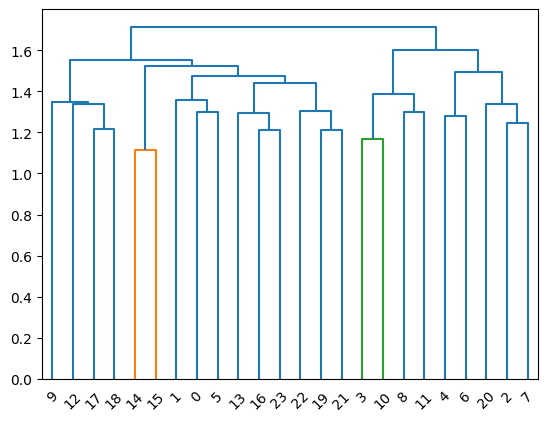

In [ ]:
dend = hierarchy.dendrogram(Z)

This will be used to find the number of clusters.

In [ ]:
def find_num_clusters(Z):
    # sort by distance
    Z = Z[Z[:, 2].argsort()]
    max_diff = 0
    max_index = 0
    for i in range(len(Z)-1):
        if Z[i+1][2]-Z[i][2] > max_diff:
            max_diff = Z[i+1][2]-Z[i][2]
            max_index = i
    return len(Z)-max_index

In [ ]:

num_clusters = find_num_clusters(Z)

In [ ]:

hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')

In [ ]:
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
y_hc

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]

In [ ]:
for i, sentence in enumerate(preprocessed_sentences):
    cluster_id = y_hc[i]
    clustered_sentences[cluster_id].append(sentences[i])

In [ ]:
for i, sentence in enumerate(preprocessed_sentences):
    cluster_id = y_hc[i]
    clustered_sentences[cluster_id].append(sentences[i])

In [ ]:
clustered_sentences

[[' It cannot be stressed enough that health is the primary thing after which everything else follows',
  ' When you maintain good health, everything else falls into place',
  'Similarly, maintaining good health is dependent on a lot of factors',
  ' Health has a lot of components that carry equal importance',
  ' If even one of them is missing, a person cannot be completely healthy',
  ' First, we have our physical health',
  ' When you have good physical health, you will have a longer life span',
  ' One may maintain their physical health by having a balanced diet',
  ' It makes able a person to gain excessive weight which is called as obesity',
  ' It cannot be stressed enough that health is the primary thing after which everything else follows',
  ' When you maintain good health, everything else falls into place',
  'Similarly, maintaining good health is dependent on a lot of factors',
  ' Health has a lot of components that carry equal importance',
  ' If even one of them is missi

# Title Generation/ Topic Modeling


In [ ]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora

In [ ]:

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

stopwords = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords and word]

In [ ]:

def clean_for_topic_modeling(docs):
#
    return [remove_stopwords(doc) for doc in docs]

In [ ]:
def get_topics(sentence_tokens, num_topics=1, num_words=2):
    dictionary = corpora.Dictionary(sentence_tokens)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in sentence_tokens]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics, id2word=dictionary, passes=30)
    return ldamodel.print_topics(num_topics, num_words)

In [ ]:

def topic_for_para(doc, num_topics=1, num_words=2):
    sentences = split_into_sentences(doc)
    sentence_vectors = sentences_to_vectors(sentences)
    sentence_tokens = clean_for_topic_modeling(sentence_vectors)
    return get_topics(sentence_tokens, num_topics, num_words)

In [ ]:

topic_for_para(document, num_topics=1, num_words=3)

[(0, '0.031*"health" + 0.024*"foods" + 0.021*"junk"')]

# Loading data for training model for summarization and title generation

In [ ]:

from os import listdir
from string import punctuation
punctuation+='\n'
import re
from bs4 import BeautifulSoup
import pandas as pd
import math
from tqdm import tqdm

In [ ]:
def load_doc(filename):
    file = open(filename, encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
def split_story(doc):
    index = doc.find('@highlight')
    story, highlights = doc[:index], doc[index:].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [ ]:
def load_stories(directory):
    all_stories = list()
    for name in tqdm(listdir(directory)):
        filename = directory + '/' + name
        doc = load_doc(filename)
        story, highlights = split_story(doc)
        all_stories.append({'story':story, 'highlights':highlights})
    return all_stories

In [ ]:
directory = '/content/cnn/stories'
data = load_stories(directory)
print('Loaded Stories %d' % len(data))

100%|██████████| 119/119 [00:00<00:00, 15099.75it/s]

Loaded Stories 119


In [ ]:
stories = [story['story'] for story in data]

In [ ]:
data_df = [[d['story'], d['highlights']] for d in data]

In [ ]:
df = pd.DataFrame(data_df).rename(columns={0:"text", 1:"summary"})
df.head()

,text,summary
0,"Greenville, South Carolina (CNN) -- Some are girlish 22-year-olds; others are women approaching 40. They come from South Carolina's rural counties and its booming cities. They are loud and muted, lively and vacant, hopeful and desperate.\n\nAs different as they are, they share a connection to two powerful forces : their addictions and their babies.\n\nThey are swallowed by the same shameful past. They don't know if they can be good mothers. They don't know if they can be clean mothers.\n\nThey're here at a state-run drug-treatment program to learn how to do both.\n\nOn this summer day, Ash...","[Serenity Place in South Carolina caters treatment programs to pregnant addicts, South Carolina has been known to prosecute women in their third trimester, A pregnant Ashley Hendrix sought treatment earlier this year for her addiction, ""If these women don't get this treatment, they are going to die,"" a counselor says]"
1,"Riverside, California (CNN) -- Authorities said Wednesday they are reasonably sure that the body found inside the burned cabin near Big Bear Lake, California, is that of Christopher Dorner, the rogue ex-cop who had been pursuing a vendetta against his fellow officers.\n\n""We believe that this investigation is over, at this point, and we'll just need to move on from here,"" San Bernardino Sheriff John McMahon told reporters.\n\nAlthough the description and behavior of the man who was killed are consistent with Dorner, officials ""cannot absolutely, positively confirm it was him,"" McMahon said...","[Slain officer's widow thanks mourners: ""A lot of people loved Mike"", Villaraigosa says police have a ""reasonable belief"" that Dorner died in a mountain standoff, Authorities have not conclusively identified the body found near Big Bear Lake]"
2,"(CNN) -- It was a year of crippling -- and creative -- hacks, a year of blockbuster sequels and (yet again) a year of slinging vengeful birds at corpulent pigs.\n\nIt was also a year in which gaming continued to expand beyond the traditional console to your phone, your tablet, your TV and your Facebook page.\n\nVideo gaming in 2011 had plenty of ups and downs -- and we're not even talking about the actual video game titles that were released.\n\nHere, in no particular order, are our choices for gaming's 10 biggest stories of the year:\n\nSony's PlayStation Network hacked\n\nWhile the explo...","[The top gaming stories of 2011 revolved around hacks, sequels, innovation, It was the year of 3 : ""Modern Warfare 3,"" ""Uncharted 3,"" and ""Battlefield 3"", Hackers created new uses for Microsoft's motion-controlled Kinect system, ""Angry Birds"" moved from just a game to pop culture phenomenon]"
3,"(CNN) -- The flagging economy has been the clear-cut No. 1 issue for this year's presidential race.\n\nBut some other concerns are just timeless.\n\n""Don't underestimate the pull of safety and security in the minds of American voters,"" said Candy Crowley, host of CNN's ""State of the Union"" and moderator of last week's presidential debate. ""There is no issue closer to home and hearth than the safety and security of your family. That is the most basic question the federal government has to answer.""\n\nPresident Obama and Republican challenger Mitt Romney face off Monday night in the last of ...","[Foreign policy is the focus of the third and last presidential debate Monday night, Safety, security have always been important issues to the American public, Decisions on Afghanistan, Iran, Syria might have a major impact on the military, China's policies are having a direct effect on U.S. economy, jobs]"
4,"(CNN) -- We're all know the saying ""to be the best, you've got to learn from the best.""\n\nAnd while it might be true that there are plenty of quality regular people out there who can help you refine your game -- ski, fish, dunk, bluff, drive -- it's nice to get instruction from a legit superstar of the craft.\n\nBut book a session with a big name -- an Olympic hero,

In [ ]:
df['text'] = df['text'].apply(lambda x: x.replace('\n',''))
df['text'] = df['text'].apply(lambda x: x.replace("\"", ""))
df['summary'] = df['summary'].apply(lambda x: ". ".join(x))
df.head()

,text,summary
0,"Greenville, South Carolina (CNN) -- Some are girlish 22-year-olds; others are women approaching 40. They come from South Carolina's rural counties and its booming cities. They are loud and muted, lively and vacant, hopeful and desperate.As different as they are, they share a connection to two powerful forces : their addictions and their babies.They are swallowed by the same shameful past. They don't know if they can be good mothers. They don't know if they can be clean mothers.They're here at a state-run drug-treatment program to learn how to do both.On this summer day, Ashley Hendrix, 24,...","Serenity Place in South Carolina caters treatment programs to pregnant addicts. South Carolina has been known to prosecute women in their third trimester. A pregnant Ashley Hendrix sought treatment earlier this year for her addiction. ""If these women don't get this treatment, they are going to die,"" a counselor says"
1,"Riverside, California (CNN) -- Authorities said Wednesday they are reasonably sure that the body found inside the burned cabin near Big Bear Lake, California, is that of Christopher Dorner, the rogue ex-cop who had been pursuing a vendetta against his fellow officers.We believe that this investigation is over, at this point, and we'll just need to move on from here, San Bernardino Sheriff John McMahon told reporters.Although the description and behavior of the man who was killed are consistent with Dorner, officials cannot absolutely, positively confirm it was him, McMahon said.We're not c...","Slain officer's widow thanks mourners: ""A lot of people loved Mike"". Villaraigosa says police have a ""reasonable belief"" that Dorner died in a mountain standoff. Authorities have not conclusively identified the body found near Big Bear Lake"
2,"(CNN) -- It was a year of crippling -- and creative -- hacks, a year of blockbuster sequels and (yet again) a year of slinging vengeful birds at corpulent pigs.It was also a year in which gaming continued to expand beyond the traditional console to your phone, your tablet, your TV and your Facebook page.Video gaming in 2011 had plenty of ups and downs -- and we're not even talking about the actual video game titles that were released.Here, in no particular order, are our choices for gaming's 10 biggest stories of the year:Sony's PlayStation Network hackedWhile the explosion of social and m...","The top gaming stories of 2011 revolved around hacks, sequels, innovation. It was the year of 3 : ""Modern Warfare 3,"" ""Uncharted 3,"" and ""Battlefield 3"". Hackers created new uses for Microsoft's motion-controlled Kinect system. ""Angry Birds"" moved from just a game to pop culture phenomenon"
3,"(CNN) -- The flagging economy has been the clear-cut No. 1 issue for this year's presidential race.But some other concerns are just timeless.Don't underestimate the pull of safety and security in the minds of American voters, said Candy Crowley, host of CNN's State of the Union and moderator of last week's presidential debate. There is no issue closer to home and hearth than the safety and security of your family. That is the most basic question the federal government has to answer.President Obama and Republican challenger Mitt Romney face off Monday night in the last of the three presiden...","Foreign policy is the focus of the third and last presidential debate Monday night. Safety, security have always been important issues to the American public. Decisions on Afghanistan, Iran, Syria might have a major impact on the military. China's policies are having a direct effect on U.S. economy, jobs"
4,"(CNN) -- We're all know the saying to be the best, you've got to learn from the best.And while it might be true that there are plenty of quality regular people out there who can help you refine your game -- ski, fish, dunk, bluff, drive -- it's nice to get instruction from a legit superstar of the craft.But book a session with a big name -- an Olympic hero, a Bassmaster Classic champ, a

#Train-test split


In [ ]:
train_size = math.floor(0.9*len(df))
train_df = df[:train_size]
test_df = df[train_size:].copy()

In [ ]:
test_df['text']

107    (CNN) -- North Korea's longtime leader Kim Jong Il, the embodiment of the reclusive state where his cult of personality is deeply entrenched, has died.He was believed to be 69.Regarded as one of the world's most-repressive leaders, Kim Jong Il always cut a slightly bizarre figure. His diminutive stature and characteristically bouffant hair have been parodied by some in the West.He's a mysterious person -- I think by design, said Han S. Park, director of the Center for the Study of Global Issues at the University of Georgia and a frequent visitor to North Korea. Mystery is a source of lever...
108    Washington (CNN) -- When President Barack Obama headed to the Jersey Shore this week to tout the recovery effort from Superstorm Sandy, congressional Republicans sought to keep the nation's focus on Washington.On the same day Obama played Touchdown Fever with New Jersey Gov. Chris Christie on the Point Pleasant boardwalk and urged Americans to come spend money in the devastated regio

#Summarization
We use the pre-trained BART model and fine-tuned it for our dataset (CNN-Dailymail).

#Fine-tuning BART
BART uses a standard Transformer-based neural machine translation architecture. It uses a standard seq2seq/machine translation architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT). Here, BART is trained over the cnn-dailymail dataset.

In [ ]:


!pip install bert-score -q
!pip install blurr

In [ ]:
!pip install ohmeow-blurr


In [ ]:
from fastai.text.all import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

from tqdm import tqdm

In [ ]:
!pip show transformers

Name: transformers
Version: 4.40.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: bert-score, ohmeow-blurr


In [ ]:
from transformers import AutoModel, AutoTokenizer  # Import specific modules or classes from the transformers library
import sentencepiece
!pip install rouge
from rouge import Rouge

In [ ]:
import torch
import pandas as pd
from rouge import Rouge
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
from transformers import BartForConditionalGeneration

In [ ]:
bart_checkpoint = "facebook/bart-large-cnn"

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
tokenizer_bart = AutoTokenizer.from_pretrained(bart_checkpoint,
                                               do_lower_case=False,
                                               use_fast=False,
                                               keep_accents=True)

model_bart = AutoModelForSeq2SeqLM.from_pretrained(bart_checkpoint).to(device)

In [ ]:
bos_id = tokenizer_bart._convert_token_to_id_with_added_voc("<s>")
eos_id = tokenizer_bart._convert_token_to_id_with_added_voc("</s>")
pad_id = tokenizer_bart._convert_token_to_id_with_added_voc("<pad>")

In [ ]:
text=test_df['text']

In [ ]:
%%time

SystemSummary = []

for i, input_text in enumerate(text):

    inp = tokenizer_bart(input_text, add_special_tokens=False,
                         truncation=True, return_tensors="pt",
                         padding='max_length', max_length=1024)['input_ids'].to(device)

    model_output = model_bart.generate(inp, use_cache=True,
                                        num_beams=4,
                                        max_length=70,
                                        min_length=30,
                                        early_stopping=True,
                                        pad_token_id=pad_id,
                                        bos_token_id=bos_id,
                                        eos_token_id=eos_id,
                                        decoder_start_token_id=tokenizer_bart._convert_token_to_id_with_added_voc("<2en>"))

    decoded_output = tokenizer_bart.decode(model_output[0],
                                    skip_special_tokens=True,
                                    clean_up_tokenization_spaces=False)

    SystemSummary.append(decoded_output)

CPU times: user 8min 1s, sys: 18.2 s, total: 8min 19s
Wall time: 8min 32s


In [ ]:
Summaries = pd.DataFrame(list(zip(test_df['summary'], SystemSummary)), columns =['OldSummary', 'BartSummary'])
Summaries.head()

,OldSummary,BartSummary
0,"Kim Jong Il took over when his father died of a heart attack in 1994. He will be remembered as one of the world's most repressive leaders. Kim was well regarded within North Korea. He played a poor hand of cards skillfully, analysts say","Kim Jong Il was the first-born son of an iron-fisted dictator. His father, Kim Il Sung, founded North Korea with Soviet backing after World War II. Kim Jong Il's younger brother drowned as a child and his mother died when he was 7 years old."
1,"NEW: In midst of controversies, Obama pushes Congress on student loans. Obama administration faces congressional probes of IRS, Benghazi, AP. Republicans say the issues reflect government gone wild. Democrats contend GOP foes politicize the process","NEW: Obama pushes Congress to extend student loan rates that are set to double on July 1. The White House is trying to shift the focus from the controversies that Republicans seek to emphasize. The GOP narrative depicts a government gone wild, with party leaders and strategists accusing the Obama administration of routinely abusing its powers."
2,"NEW: It's unclear how much of a role Russia played, U.S. intelligence says. The European Union agrees on a plan for new sanctions to include Russia. Ukraine opens criminal cases against Russian defense minister and businessman. Dutch official: At least 200 bodies were on the train; more could be at crash site","NEW: A top Ukrainian official says he has no doubt that a Russian fired the missile. NEW: The person who shot down the flight was absolutely a Russian, the official says. Dutch PM: Identifying bodies could take months. A train carrying the remains of crash victims arrives in Kharkiv, Ukraine."
3,"NEW: Disaster management agency says 2,487 people have been injured. 1,774 people are confirmed dead from Haiyan. Another 14 dead in Vietnam and five in China, those governments say. International relief heads for stricken islands, but roads a problem","NEW: A new tropical depression dumps heavy rain on the area. The government's confirmed death toll was 1,774 early Tuesday. The storm has injured 2,487 more, and displaced 660,000 people from their homes."
4,"Shinseki rescinds 2013 bonus for Phoenix VA director. President Obama defends VA Secretary Shinseki, promises accountability. The number of VA facilities under investigation has expanded to 26. NEW: House panel wants three VA officials to appear at a meeting on Thursday","NEW: Shinseki rescinds $8,495 bonus awarded to Phoenix VA Director Sharon Helman. President Obama says he needs more time to review what's going on at the VA. The number of VA facilities under investigation has expanded to 26, the agency says. CNN first reported the problem last November in a detailed investigation."


#ROUGE Score

In [ ]:
rouge = Rouge()
score = rouge.get_scores(Summaries['BartSummary'], Summaries['OldSummary'], avg=True)
BartRouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
BartRouge

,rouge-1,rouge-2,rouge-l
recall,0.292441,0.078604,0.272207
precision,0.281168,0.073370,0.262821
f-measure,0.283620,0.074568,0.264585


In [ ]:
!pip install rouge_score
from rouge_score import rouge_scorer

In [ ]:
def rouge_score(ground_truth, predicted, rouge_scores, score_type=['rougeL']):
    scorer = rouge_scorer.RougeScorer(score_type, use_stemmer=True)
    for i in range(len(ground_truth)):
        scores = scorer.score(ground_truth.iloc[i], predicted.iloc[i])
        rouge_scores.iloc[i] = scores['rougeL'].fmeasure
    return rouge_scores.min(), rouge_scores.max(), rouge_scores.mean(), rouge_scores.median()

In [ ]:
Summaries['rouge_score'] = ''
rouge_min, rouge_max, rouge_mean, rouge_median = rouge_score(Summaries['OldSummary'], Summaries['BartSummary'], Summaries['rouge_score'])

In [ ]:
print("Rouge score:")
print("Minimum: ", rouge_min)
print("Maximum: ", rouge_max)
print("Mean: ", rouge_mean)
print("Median: ", rouge_median)

Rouge score:
Minimum:  0.08695652173913045
Maximum:  0.4421052631578948
Mean:  0.21524559402739016
Median:  0.200670297444491


#Nested Summarization with Heading Hierarchy
This is achieved by combining sentence clustering, summarization and topic modeling.
Topic modeling is done on the entire document to get the 'aboutness' of the document. This is set as the level 1 heading (H1). The sentences in the given document are then clustered to get paragraphs of sentences representing similar topics. Summarization and topic modeling is done on each of these paragraphs to get summarized text for each of level 2 headings (H2).

In [ ]:
document

'Health was earlier said to be the ability of the body functioning well. However, as time evolved, the definition of health also evolved. It cannot be stressed enough that health is the primary thing after which everything else follows. When you maintain good health, everything else falls into place.Similarly, maintaining good health is dependent on a lot of factors. It ranges from the air you breathe to the type of people you choose to spend your time with. Health has a lot of components that carry equal importance. If even one of them is missing, a person cannot be completely healthy. First, we have our physical health. This means being fit physically and in the absence of any kind of disease or illness. When you have good physical health, you will have a longer life span. One may maintain their physical health by having a balanced diet. Do not miss out on the essential nutrients; take each of them in appropriate quantities. Junk foods taste good that is why it is mostly liked by eve

In [ ]:
import re
def get_first_topic(topics):
    indexes = [m.start() for m in re.finditer('\"', topics[0][1])]
    extracted_topics = []
    for i in range(0,len(indexes)-1,2):
        extracted_topics.append(topics[0][1][indexes[i]+1:indexes[i+1]])
    return extracted_topics

In [ ]:
topics = topic_for_para(document, 1, 3)
topics

[(0, '0.031*"health" + 0.024*"foods" + 0.021*"junk"')]

In [ ]:
h1_heading = get_first_topic(topics)
h1_heading

['health', 'foods', 'junk']

In [ ]:
clustered_sentences

[[' It cannot be stressed enough that health is the primary thing after which everything else follows',
  ' When you maintain good health, everything else falls into place',
  'Similarly, maintaining good health is dependent on a lot of factors',
  ' Health has a lot of components that carry equal importance',
  ' If even one of them is missing, a person cannot be completely healthy',
  ' First, we have our physical health',
  ' When you have good physical health, you will have a longer life span',
  ' One may maintain their physical health by having a balanced diet',
  ' It makes able a person to gain excessive weight which is called as obesity',
  ' It cannot be stressed enough that health is the primary thing after which everything else follows',
  ' When you maintain good health, everything else falls into place',
  'Similarly, maintaining good health is dependent on a lot of factors',
  ' Health has a lot of components that carry equal importance',
  ' If even one of them is missi

In [ ]:
paragraphs = [{'text': ". ".join(i)} for i in clustered_sentences]

In [ ]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name,
                                                                  model_cls=BartForConditionalGeneration)
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(hf_arch, hf_config, hf_tokenizer, hf_model,is_split_into_words=True, task='summarization',
text_gen_kwargs={'max_length': 248,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False})

In [ ]:
blocks = (Seq2SeqTextBlock(hf_arch, hf_config, hf_tokenizer, hf_model, task='summarization'), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader('text'), get_y=ColReader('summary'), splitter=RandomSplitter())

In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
dls = dblock.dataloaders(train_df, bs=2)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3921: UserWarning:

`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.



In [ ]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls,
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt()
learn.freeze()

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning:

The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.



/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning:

The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.



In [ ]:
def summarize_doc(doc):
    return learn.blurr_generate(doc, early_stopping=False, num_return_sequences=1)[0]['generated_texts']

In [ ]:

for paragraph in paragraphs:
    paragraph['summary'] = summarize_doc(paragraph['text'])
    topics = topic_for_para(paragraph['summary'], 1, 3)
    print(get_first_topic(topics))
    paragraph['h2_heading'] = get_first_topic(topics)

['health', 'person', 'one']
['high', 'health', 'time']


In [ ]:
def summarize(data):
#     Takes a pd data series as input
    tqdm.pandas(desc='Summarization')
    return data.progress_apply(lambda x: summarize_doc(x))

In [ ]:
output_file = open("./output.md", "w")

In [ ]:
def write_h1(f, h1_heading):
    f.write("# ")
    for h in h1_heading:
        f.write(h + " | ")
    f.write("\n")

In [ ]:
def write_sections(f, paragraphs):
    for para in paragraphs:
        f.write("## ")
        for h in para['h2_heading']:
            f.write(h + " | ")
        f.write('\n')
        f.write(para['summary'])
        f.write('\n')

In [ ]:
write_h1(output_file, h1_heading)
write_sections(output_file, paragraphs)

In [ ]:
output_file.close()

In [ ]:
output_file = open("./output.md", "r")

In [ ]:
print(output_file.read())

# health | foods | junk | 
## health | person | one | 
Health has a lot of components that carry equal importance. If even one of them is missing, a person cannot be completely healthy. When you have good physical health, you will have a longer life span. One may maintain their physical health by having a balanced diet. It makes able a person to gain excessive weight which is called as obesity.
## high | health | time | 
Health was earlier said to be the ability of the body functioning well. However, as time evolved, the definition of health also evolved. It ranges from the air you breathe to the type of people you choose to spend your time with. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They become high in calories, high in cholesterol, low in healthy nutrients and high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unheal

In [ ]:

output_file.close()


A .md file with the summary and a hierarchy of headings (H1: represented by # and H2: represented by ##) is created as output.

#References
* Lecture Slides
* [Blurr Documentation](https://ohmeow.github.io/blurr/)
*[ Hierarchical Clustering](https://blog.eduonix.com/2019/04/clustering-similar-sentences-together-using-machine-learning/)
*[Text Summarization using Bart](https://github.com/Jay-Suthar/TEXT-SUMMARIZATION-USING-BART-T5-PROPHETNET-PEGASUS/blob/master/group-22-ir-project.ipynb)
